In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv('data.csv')

df

,ID,X,Y,Z
0,0,1.0,1.2,2.0
1,1,2.0,4.5,4.0
2,2,7.0,8.0,6.0
3,3,20.0,5.0,7.0
4,4,7.0,20.0,15.0
5,5,20.5,13.7,16.3
6,6,6.7,14.0,12.8
7,7,12.9,18.7,16.0
8,8,9.7,18.0,17.5
9,9,17.5,9.9,7.1


In [12]:
df.shape

(20, 4)

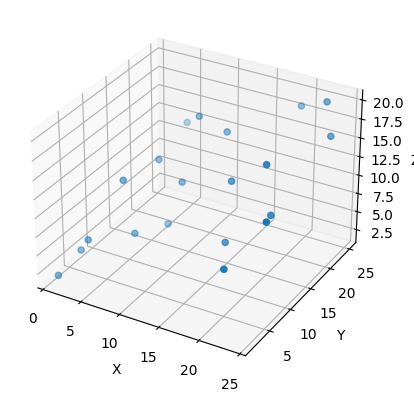

In [13]:
from mpl_toolkits.mplot3d import Axes3D

X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [14]:
num_clusters = int(input("Enter the number of clusters: "))

centroids = []
for i in range(num_clusters):
    x = float(input(f"Enter X-coordinate for centroid {i + 1}: "))
    y = float(input(f"Enter Y-coordinate for centroid {i + 1}: "))
    z = float(input(f"Enter Z-coordinate for centroid {i + 1}: "))
    centroids.append([x, y,z])

Enter the number of clusters: 3
Enter X-coordinate for centroid 1: 3
Enter Y-coordinate for centroid 1: 5
Enter Z-coordinate for centroid 1: 6
Enter X-coordinate for centroid 2: 7
Enter Y-coordinate for centroid 2: 9
Enter Z-coordinate for centroid 2: 10
Enter X-coordinate for centroid 3: 18
Enter Y-coordinate for centroid 3: 20
Enter Z-coordinate for centroid 3: 22


In [15]:
print(centroids)


[[3.0, 5.0, 6.0], [7.0, 9.0, 10.0], [18.0, 20.0, 22.0]]


In [16]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, init=centroids, n_init=1)
labels = kmeans.fit_predict(df[['X', 'Y','Z']])

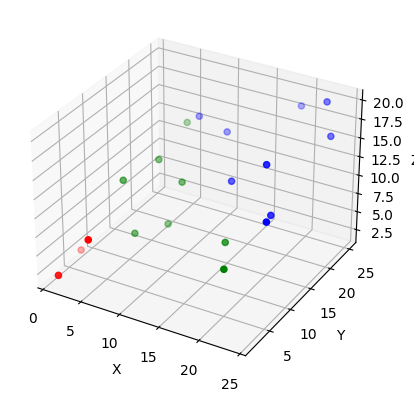

In [17]:

colors = ['r', 'g', 'b', 'c', 'm', 'y']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    ax.scatter(df.loc[labels == i, 'X'], df.loc[labels == i, 'Y'], df.loc[labels == i, 'Z'], color=colors[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


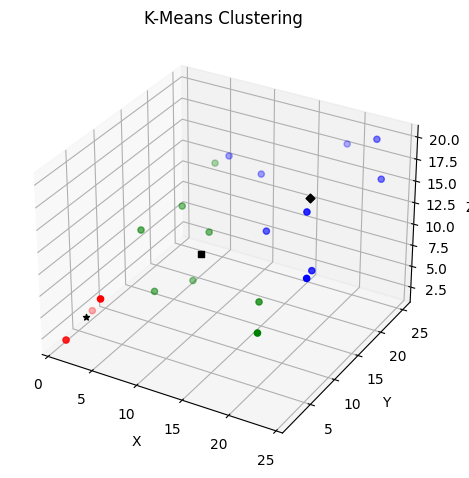

In [18]:

markers = ['*', 's', 'D', '^', 'v']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    ax.scatter(df.loc[labels == i, 'X'], df.loc[labels == i, 'Y'], df.loc[labels == i, 'Z'], color=colors[i])

    centroid = kmeans.cluster_centers_[i]
    ax.scatter(centroid[0], centroid[1], centroid[2], marker=markers[i], color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()
